In [74]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from Bio.Seq import Seq
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches
import scipy.cluster.hierarchy as sch

In [75]:
# read the raw reads
raw_reads = pd.read_csv('../data/interim/finalData/counttable.csv', index_col=0)

# Filter out the lowly expressed sequences
#raw_reads = raw_reads.loc[raw_reads.sum(axis=1) > 100000]

# read the metadata
metadata = pd.read_csv('../data/raw/sample_sheet.csv', index_col=0)

raw_reads

,1FgAgo1_A,1FgAgo2_A,1FgAgo3_A,1FgAgo4_A,2FgAgo1_A,2FgAgo2_A,2FgAgo3_A,2FgAgo4_A,3BbAgo1_A,3BbAgo2_A,...,7FoAgo3_A,7FoAgo4_A,8FoAgo1_A,8FoAgo2_A,8FoAgo3_A,8FoAgo4_A,9L1_A,9L2_A,9L3_A,9L4_A
sequences,,,,,,,,,,,,,,,,,,,,,
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCACTTGGAGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,201741,190927,185439,187282,278787,264234,258382,260925,167636,155638,...,327221,328377,321980,303256,295386,300703,15690,14923,14615,15237
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTTCAGGTTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,12159,11379,11077,11305,0,0,0,0,8830,8188,...,0,0,0,0,0,0,0,0,0,0
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCGCAAAAGCAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,10337,9731,9665,9781,0,0,0,0,4651,4333,...,1281,1371,0,0,0,0,0,0,0,0
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTGCGACATGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,10257,9627,9588,9591,247,246,244,233,0,0,...,0,0,0,0,0,0,0,0,0,0
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCATTCAATCAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,8889,8493,8055,8157,0,0,0,0,0,0,...,0,0,0,0,0,1125,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGCATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTCTTTCGTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGCTGACACTTCTAAATAAGCGAATTTCTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
ACTACTATTGCCAGCATTGCTGCTAAGGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGCGCGAAAAACAGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
ACTACTATTGCCAGCAATACATACAGGGGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCCTTTTGTGCGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


## Hierarchical clustering of all samples

/var/folders/90/3j1z360d3ys7y_4lx77mk_br0000gp/T/ipykernel_3177/3848586796.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')


Number of cluster:  12


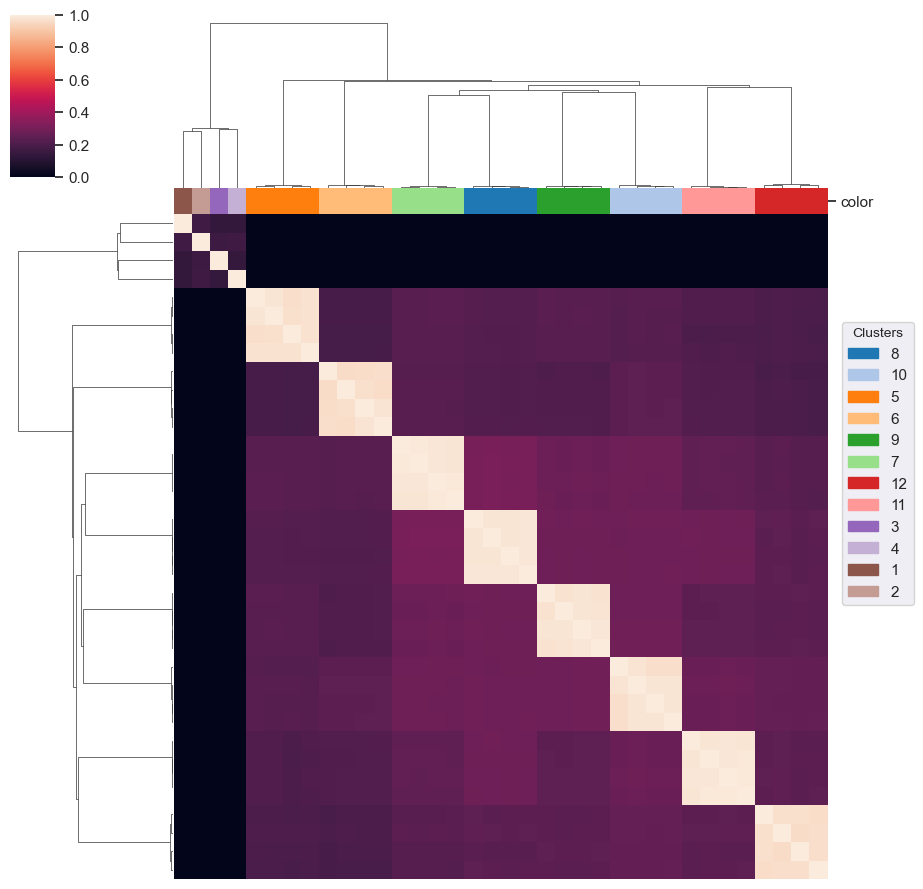

In [76]:
def global_clustering(data, threshold=0.3, xticklabels=False, yticklabels=False, figsize=(9,9)):
    
    # Retrieve clusters using fcluster 
    corr = data.corr()
    corr.fillna(0,inplace=True)
    dist = sch.distance.pdist(corr)
    link = sch.linkage(dist, method='complete')
    clst = pd.DataFrame(index=data.columns)
    clst['cluster'] = sch.fcluster(link, threshold * dist.max(), 'distance')

    # Get colors for each cluster
    cm = plt.cm.get_cmap('tab20')
    cluster_colors = dict(zip(clst.cluster.unique(), cm.colors))
    clst['color'] = clst.cluster.map(cluster_colors)

    print('Number of cluster: ', len(cluster_colors))
    
    legend_items = [patches.Patch(color=c, label=l) for l,c in cluster_colors.items()]
    
    sns.set(rc={'figure.facecolor':'white'})
    
    clst_map = sns.clustermap(data.corr(), 
                              figsize=figsize, 
                              row_linkage=link, 
                              col_linkage=link, 
                              col_colors=clst.color,
                              yticklabels=yticklabels, 
                              xticklabels=xticklabels,
                              vmin=0, 
                              vmax=1)
    
    legend = clst_map.ax_heatmap.legend(loc='upper left', 
                                        bbox_to_anchor=(1.01,0.85), 
                                        handles=legend_items,
                                        frameon=True)
    
    legend.set_title(title='Clusters',prop={'size':10})
    
    return clst['cluster']

vst_reads = pd.read_csv('../data/processed/vst_transformed_reads.csv', index_col=0)

# Normalize the data
scaler = StandardScaler()
counts_scaled = scaler.fit_transform(vst_reads)

# Convert the scaled data back into a DataFrame
counts_scaled = pd.DataFrame(counts_scaled, columns=vst_reads.columns)

clusters = global_clustering(counts_scaled, threshold=0.3, xticklabels=False, yticklabels=False, figsize=(9,9))

# Save the figure
plt.savefig('../reports/figures/nt_global_clustering.pdf', bbox_inches='tight')

In [77]:
clusters[clusters == 9]

5BcAgo1_A    9
5BcAgo2_A    9
5BcAgo3_A    9
5BcAgo4_A    9
Name: cluster, dtype: int32

No outliers for the technical replicates, proceed to merge the technical replicates.

In [78]:
raw_reads_t = raw_reads.T

# Convert the index of raw_reads to a column
raw_reads_t['Sample_ID'] = raw_reads_t.index

# Merge raw_reads with metadata on 'Sample_ID'
merged_df = raw_reads_t.merge(metadata, left_on='Sample_ID', right_index=True)

# Group by biological replicate and calculate the sum of reads
grouped_df = merged_df.groupby('biological_replicate').sum()

# Drop unnecessary columns
grouped_df = grouped_df.drop(columns=['Sample_Name', 'technical_replicate', 'Sample_ID'])

# Now `grouped_df` contains the combined reads for each biological replicate
grouped_df = grouped_df.T

grouped_df.to_csv('../data/interim/finalData/combined_counts.csv')

grouped_df

biological_replicate,BbAgo1,BbAgo2,BcAgo1,BcAgo2,FgAgo1,FgAgo2,FoAgo1,FoAgo2,L1
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCACTTGGAGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,631412,894099,730723,1687840,765389,1062328,1345171,1221325,60465
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTTCAGGTTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,33286,0,22540,13376,45920,0,0,0,0
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCGCAAAAGCAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,17855,0,27747,0,39514,0,5374,0,0
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTGCGACATGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,0,0,0,0,39063,970,0,0,0
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCATTCAATCAGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,0,3146,0,0,33594,0,0,1125,0
...,...,...,...,...,...,...,...,...,...
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGCATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCTCTTTCGTGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGCTGACACTTCTAAATAAGCGAATTTCTT,0,0,0,0,0,0,0,0,10
ACTACTATTGCCAGCATTGCTGCTAAGGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGCGCGAAAAACAGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCTT,0,0,0,0,0,0,0,0,9
ACTACTATTGCCAGCAATACATACAGGGGAAGAAGGGGTATCTCTCGATAAAAGAGAGGCTGAAGCTTGGTGCCTTTTGTGCGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGCGAATTTCT,0,0,0,0,0,0,0,0,8
ACTACTATTGCCAGCATTGCTGCTAAAGAAGAAGGGGTATCTCTTGATAAAAGAGAGGCTGAAGCTTGGTGCGCGCCGGGGGGACAACCTTGTTGGTAATAGAGGACAGATGTAGATACGTTGTTGACACTTCTAAATAAGGGAATTTCTT,0,0,0,0,0,0,0,0,6


In [79]:
# Normalize the counts table against read depth - Reads per Million (RPM)
total_counts = grouped_df.sum()
normalized_reads = grouped_df.divide(total_counts) * 1e6

normalized_reads.to_csv('../data/processed/nt_rpm_normalized_counts.csv')



# Function to translate a sequence to an amino acid sequence
def translate_sequence(seq):
    return str(Seq(seq).translate())

aa_grouped_df = grouped_df.copy()

# Translate sequences to amino acid sequences
aa_grouped_df.index = aa_grouped_df.index.map(translate_sequence)

# Group by amino acid sequences and sum counts
aa_grouped_df = aa_grouped_df.groupby(aa_grouped_df.index).sum()


# normalize the amino acid reads to RPM
aa_total_counts = aa_grouped_df.sum()
aa_normalized_reads = aa_grouped_df.divide(aa_total_counts) * 1e6

# Sort by '1FgAgo1_A' in descending order
aa_normalized_reads = aa_normalized_reads.sort_values('BbAgo1', ascending=False)

aa_normalized_reads.to_csv('../data/processed/aa_rpm_normalized_reads.csv')

aa_normalized_reads

/Users/nilmat/miniconda3/envs/biopython/lib/python3.11/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


biological_replicate,BbAgo1,BbAgo2,BcAgo1,BcAgo2,FgAgo1,FgAgo2,FoAgo1,FoAgo2,L1
TTIASIAAKEEGVSLDKREAEAWCTWRGQPCW**RTDVDTLLTLLNKRIS,139371.593014,212600.851051,142291.614093,339991.576232,153743.982772,220048.969519,283064.093276,211109.060617,3333.886730
TTIASIAAKEEGVSLDKREAEAWCLRVGQPCW**RTDVDTLLTLLNKRIS,12923.544911,7133.627524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.324084
TTIASIAAKEEGVSLDKREAEAWCLRPGQPCW**RTDVDTLLTLLNKRIS,8697.819419,3482.197618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,766.796705
TTIASIAAKEEGVSLDKREAEAWCNIRGQPCW**RTDVDTLLTLLNKRIS,8270.310686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.748739
TTIASIAAKEEGVSLDKREAEAWCKDLGQPCW**RTDVDTLLTLLNKRIS,8205.964011,0.000000,3620.417271,0.000000,0.000000,0.000000,0.000000,692.084728,84.966831
...,...,...,...,...,...,...,...,...,...
TTIASIAAKEEGVSLDKREAEAWCHS*GQPCW**RTDVDTLLTLLNKRIS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.436032
TTIASIAAKEEGVSLDKREAEAWCHSAGQPCW**RTERLKLGALCMDNLV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.238059
TTIASIAAKEEGVSLDKREAEAWCHSDGQPCW**RTDVDTLLTLLNKRIS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.007374
TTIASIAAKEEGVSLDKREAEAWCHSEGQPCW**RTDGEAEAWCD*YGQP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.245585


## Check the correlation between the biological replicates.

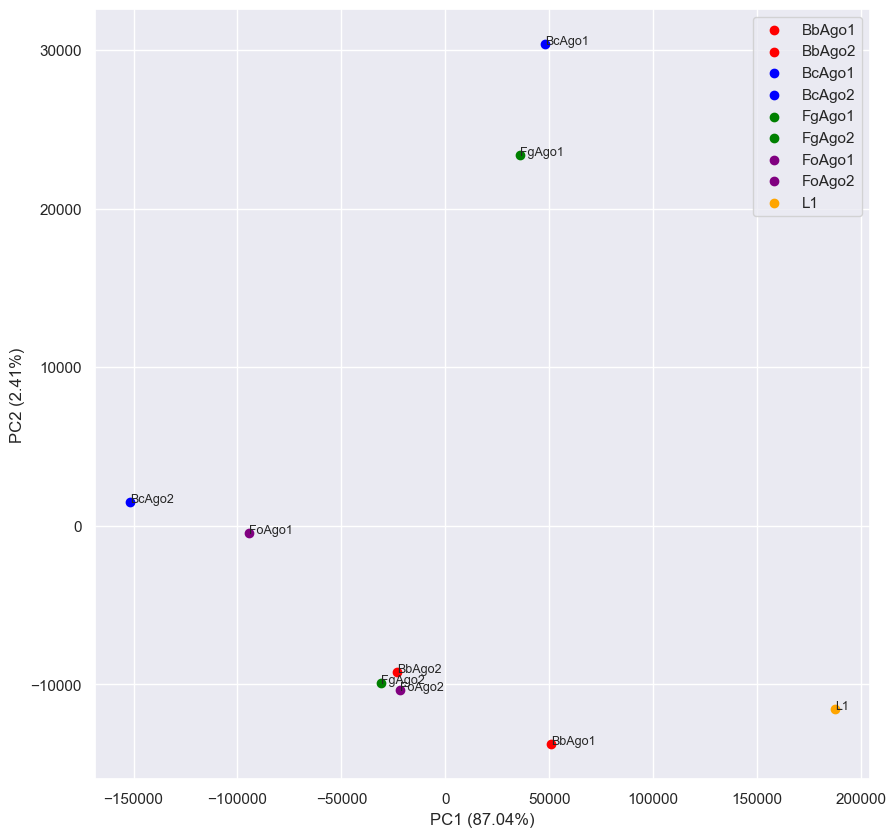

In [80]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(aa_normalized_reads.T)  # Transpose normalized_reads to have samples as rows

# Convert PCA results to DataFrame and set index
pca_df = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'], index=aa_normalized_reads.columns)

# Define a color for each biological replicate
color_dict = {
    'BbAgo1': 'red',
    'BbAgo2': 'red',
    'BcAgo1': 'blue',
    'BcAgo2': 'blue',
    'FgAgo1': 'green',
    'FgAgo2': 'green',
    'FoAgo1': 'purple',
    'FoAgo2': 'purple',
    'L1': 'orange'
}

# Plot PCA results
plt.figure(figsize=(10,10))
for sample in pca_df.index:
    plt.scatter(pca_df.loc[sample, 'PC1'], pca_df.loc[sample, 'PC2'], color=color_dict[sample], label=sample)
    plt.text(pca_df.loc[sample, 'PC1'], pca_df.loc[sample, 'PC2'], sample, fontsize=9)

# Get the explained variance
explained_variance = pca.explained_variance_ratio_

plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.legend()
plt.show()

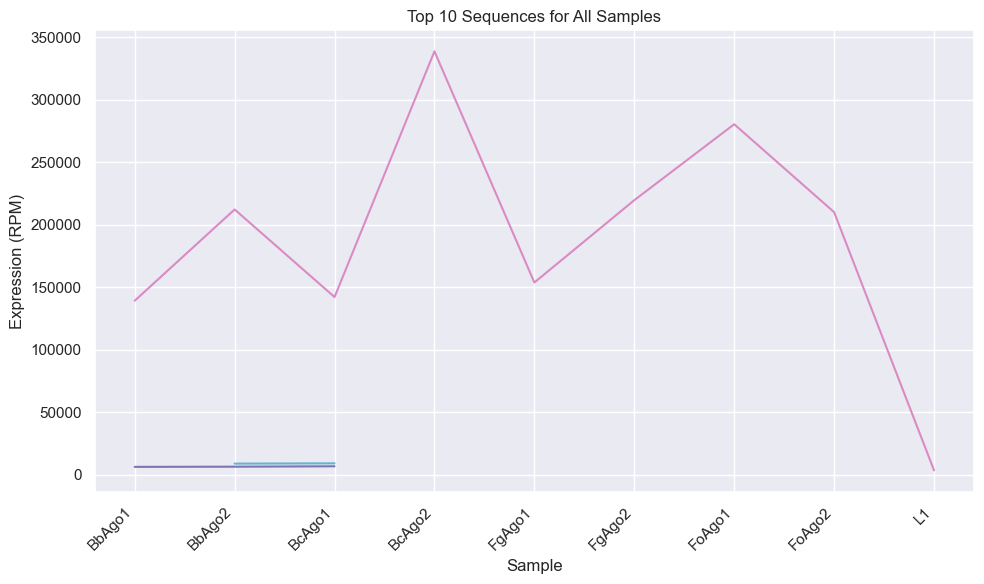

In [81]:
import matplotlib.pyplot as plt

# Sort the sequences by their total expression across all samples
normalized_reads_sorted = normalized_reads.loc[normalized_reads.sum(axis=1).sort_values(ascending=False).index]

# Select the top 10 sequences
# Get the top 10 sequences for each sample
top_10_sequences_each_sample = normalized_reads.apply(lambda x: x.sort_values(ascending=False).head(12))

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each of the top 10 sequences
for sequence in top_10_sequences_each_sample.index:
    ax.plot(top_10_sequences_each_sample.columns, top_10_sequences_each_sample.loc[sequence], label=sequence)

ax.set_xlabel('Sample')
ax.set_ylabel('Expression (RPM)')
ax.set_title('Top 10 Sequences for All Samples')
#ax.legend()  # Uncomment this line if you want to add a legend
# rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

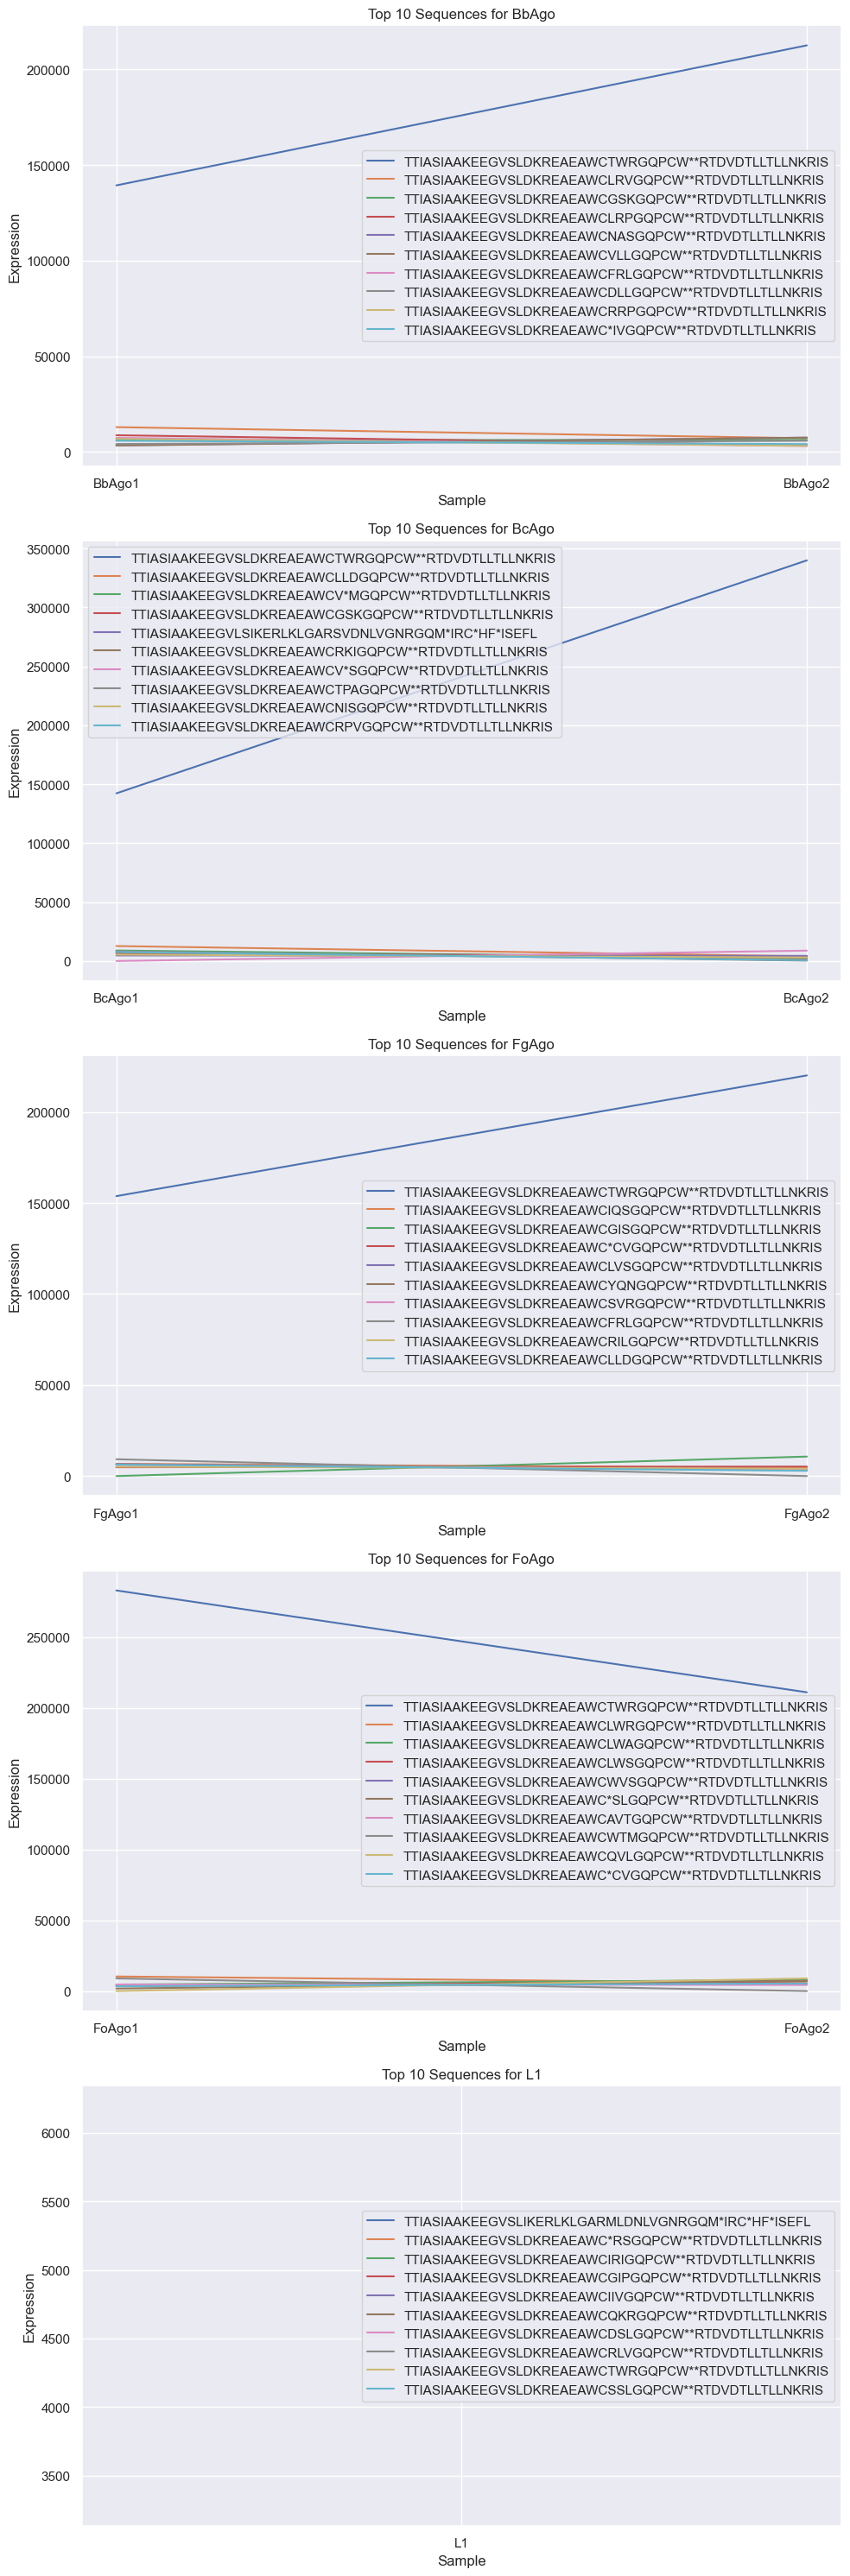

In [82]:
import matplotlib.pyplot as plt

# Define the biological replicates
biological_replicates = {
    'BbAgo': ['BbAgo1', 'BbAgo2'],
    'BcAgo': ['BcAgo1', 'BcAgo2'],
    'FgAgo': ['FgAgo1', 'FgAgo2'],
    'FoAgo': ['FoAgo1', 'FoAgo2'],
    'L1': ['L1']
}

# Create a subplot for each biological_replicate
fig, axs = plt.subplots(len(biological_replicates), 1, figsize=(10, 6*len(biological_replicates)))

for i, (biological_replicate, sample_ids) in enumerate(biological_replicates.items()):
    # Use the sample_ids to get the corresponding samples from the dataframe
    samples = aa_normalized_reads[sample_ids]

    # Sort the sequences by their total expression across all samples
    samples = samples.loc[samples.sum(axis=1).sort_values(ascending=False).index]

    # Select the top 10 sequences
    top_10_sequences = samples.head(10)

    # Plot the top 10 sequences
    for sequence in top_10_sequences.index:
        axs[i].plot(top_10_sequences.columns, top_10_sequences.loc[sequence], label=sequence)

    axs[i].set_xlabel('Sample')
    axs[i].set_ylabel('Expression')
    axs[i].set_title(f'Top 10 Sequences for {biological_replicate}')
    axs[i].legend()  # Uncomment this line if you want to add a legend

plt.tight_layout()
plt.show()

# Subtract baseline expression

In [83]:
# Subtract the baseline level of expression from all samples
for biological_replicate, samples in biological_replicates.items():
    for sample in samples:
        if sample != 'L1':
            normalized_reads[sample] -= normalized_reads['L1']

# Remove the 'L1' column
normalized_reads = normalized_reads.drop(columns=['L1'])

# Remove sequences with sum across all samples equal to or less than 0
normalized_reads = normalized_reads[normalized_reads.sum(axis=1) > 0]

# Save the normalized counts
normalized_reads.to_csv('../data/processed/nt_rpm_minus_control_expression.csv')

# Subtract the baseline level of expression from all samples
for biological_replicate, samples in biological_replicates.items():
    for sample in samples:
        if sample != 'L1':
            aa_normalized_reads[sample] -= aa_normalized_reads['L1']

# Remove the 'L1' column
aa_normalized_reads = aa_normalized_reads.drop(columns=['L1'])

# Remove sequences with sum across all samples equal to or less than 0
aa_normalized_reads = aa_normalized_reads[aa_normalized_reads.sum(axis=1) > 0]

# Save the normalized counts
aa_normalized_reads.to_csv('../data/processed/aa_rpm_minus_control_expression.csv')